In [42]:
!pip install pyforest

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
from pyforest import *
lazy_imports()

['from dask import dataframe as dd',
 'from sklearn.model_selection import StratifiedKFold',
 'import gensim',
 'import os',
 'import dash',
 'import plotly.graph_objs as go',
 'import glob',
 'from sklearn.manifold import TSNE',
 'from openpyxl import load_workbook',
 'import datetime as dt',
 'import awswrangler as wr',
 'import matplotlib as mpl',
 'import lightgbm as lgb',
 'from pyspark import SparkContext',
 'from sklearn import metrics',
 'import xgboost as xgb',
 'import keras',
 'from fbprophet import Prophet',
 'import bokeh',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'import fbprophet',
 'from sklearn.impute import SimpleImputer',
 'from xlrd import open_workbook']

In [44]:
data = pd.read_csv('/content/wisc_bc_data.csv')

<IPython.core.display.Javascript object>

#**Performing Exploratory Data Analysis/Data Preparation**

In [45]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [46]:
data.shape

(569, 32)

In [47]:
data.isnull().values.any()

False

In [48]:
data.dtypes

id                     int64
diagnosis             object
radius_mean          float64
texture_mean         float64
perimeter_mean       float64
area_mean            float64
smoothness_mean      float64
compactness_mean     float64
concavity_mean       float64
points_mean          float64
symmetry_mean        float64
dimension_mean       float64
radius_se            float64
texture_se           float64
perimeter_se         float64
area_se              float64
smoothness_se        float64
compactness_se       float64
concavity_se         float64
points_se            float64
symmetry_se          float64
dimension_se         float64
radius_worst         float64
texture_worst        float64
perimeter_worst      float64
area_worst           float64
smoothness_worst     float64
compactness_worst    float64
concavity_worst      float64
points_worst         float64
symmetry_worst       float64
dimension_worst      float64
dtype: object

In [49]:
data.diagnosis = data.diagnosis.astype('category')

In [50]:
data.dtypes

id                      int64
diagnosis            category
radius_mean           float64
texture_mean          float64
perimeter_mean        float64
area_mean             float64
smoothness_mean       float64
compactness_mean      float64
concavity_mean        float64
points_mean           float64
symmetry_mean         float64
dimension_mean        float64
radius_se             float64
texture_se            float64
perimeter_se          float64
area_se               float64
smoothness_se         float64
compactness_se        float64
concavity_se          float64
points_se             float64
symmetry_se           float64
dimension_se          float64
radius_worst          float64
texture_worst         float64
perimeter_worst       float64
area_worst            float64
smoothness_worst      float64
compactness_worst     float64
concavity_worst       float64
points_worst          float64
symmetry_worst        float64
dimension_worst       float64
dtype: object

In [51]:
data.drop(columns='id', axis =1, inplace = True)

In [52]:
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,B,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,0.2023,0.6850,1.236,16.89,0.005969,0.014930,0.01564,0.008463,0.01093,0.001672,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,0.3380,2.5090,2.394,19.33,0.017360,0.046710,0.02611,0.012960,0.03675,0.006758,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,M,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,0.2054,0.4956,1.344,19.53,0.003290,0.013950,0.01774,0.006009,0.01172,0.002575,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,B,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,0.3060,0.7213,2.143,25.70,0.006133,0.012510,0.01615,0.011360,0.02207,0.003563,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


#**Splitting our Data into Testing and Training Data**

In [53]:
X =data.iloc[:,1:32]
Y = data.iloc[:,0]

In [54]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,0.1959,0.05955,0.2360,0.6656,1.670,17.43,0.008045,0.011800,0.01683,0.012410,0.01924,0.002248,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,0.1922,0.06491,0.4505,1.1970,3.430,27.10,0.007470,0.035810,0.03354,0.013650,0.03504,0.003318,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.54,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,0.1771,0.06072,0.3384,1.3430,1.851,26.33,0.011270,0.034980,0.02187,0.019650,0.01580,0.003442,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,0.05544,0.1783,0.4125,1.338,17.72,0.005012,0.014850,0.01551,0.009155,0.01647,0.001767,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,13.17,18.22,84.28,537.3,0.07466,0.05994,0.04859,0.02870,0.1454,0.05549,0.2023,0.6850,1.236,16.89,0.005969,0.014930,0.01564,0.008463,0.01093,0.001672,14.90,23.89,95.10,687.6,0.1282,0.1965,0.18760,0.10450,0.2235,0.06925
565,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,0.3380,2.5090,2.394,19.33,0.017360,0.046710,0.02611,0.012960,0.03675,0.006758,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488
566,15.28,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,0.2054,0.4956,1.344,19.53,0.003290,0.013950,0.01774,0.006009,0.01172,0.002575,17.80,28.03,113.80,973.1,0.1301,0.3299,0.36300,0.12260,0.3175,0.09772
567,14.53,13.98,93.86,644.2,0.10990,0.09242,0.06895,0.06495,0.1650,0.06121,0.3060,0.7213,2.143,25.70,0.006133,0.012510,0.01615,0.011360,0.02207,0.003563,15.80,16.93,103.10,749.9,0.1347,0.1478,0.13730,0.10690,0.2606,0.07810


#**Standardizing our data**

In [55]:
from scipy.stats import zscore

In [56]:
X_scaled = X.apply(zscore)

In [57]:
X_scaled

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,-0.513297,-1.605595,-0.540376,-0.542624,0.458285,-0.654413,-0.614306,-0.307442,0.538081,-0.460382,-0.610577,-1.000163,-0.592086,-0.503995,0.334687,-0.764465,-0.499468,0.099574,-0.157680,-0.585118,-0.573451,-1.634499,-0.604391,-0.582718,0.268776,-0.812128,-0.709978,-0.315133,-0.119321,-0.899721
1,-1.001801,-0.079038,-0.934566,-0.877375,0.036986,0.196319,-0.312987,-0.580343,0.402996,0.299453,0.163598,-0.036021,0.279168,-0.291238,0.143013,0.577443,0.054586,0.300714,1.755360,-0.180390,-0.908925,-0.445740,-0.863230,-0.801227,-0.485202,-0.017590,-0.386625,-0.538203,0.063489,-0.447528
2,-0.876835,-0.572377,-0.867014,-0.801153,0.806996,-0.498443,-0.732448,-0.622129,-0.356400,0.085395,-0.752419,0.308704,-0.754456,-0.589582,-0.627685,-0.901115,-0.707363,-0.699633,-0.407102,-0.604031,-0.799171,0.124213,-0.814083,-0.719308,0.198638,-0.674722,-0.793935,-0.613574,0.157320,-0.284606
3,-0.808671,-1.372888,-0.781338,-0.768161,1.426135,0.175472,-0.532950,-0.024740,-0.148296,-0.294523,-0.240994,0.228873,-0.502485,-0.308180,1.409731,0.531055,-0.332357,1.273972,-0.574190,-0.133486,-0.900641,-1.613330,-0.915355,-0.785054,0.189871,-0.458434,-0.889933,-0.433901,-1.292212,-0.892517
4,0.301824,-1.414775,0.234000,0.161860,-1.190618,-0.663320,-0.688883,-0.576473,-0.330843,-1.043018,-0.818829,-1.459374,-0.756436,-0.497614,-0.676354,-0.594002,-0.543235,-0.428418,-0.493068,-0.767057,-0.014328,-1.619844,-0.082245,-0.108082,-0.866574,-0.512506,-0.652408,-0.499832,-0.669366,-0.902492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.271884,-0.248914,-0.316713,-0.334435,-1.544310,-0.841464,-0.504827,-0.521532,-1.305645,-1.035930,-0.732208,-0.964965,-0.806929,-0.515876,-0.357341,-0.589531,-0.538925,-0.540667,-1.163843,-0.802991,-0.283535,-0.291038,-0.362232,-0.339247,-0.182734,-0.367466,-0.405815,-0.153883,-1.077047,-0.814381
565,-1.098366,-1.065715,-1.061432,-0.947908,0.175047,-0.241650,-0.665279,-0.736396,-0.652127,1.028102,-0.242438,2.344398,-0.233684,-0.462192,3.439813,1.186639,-0.191771,0.188790,1.962404,1.120795,-1.116007,-1.009179,-1.083347,-0.920238,0.159186,-0.576756,-0.962232,-1.124731,-0.755108,0.051769
566,0.327386,0.726127,0.286312,0.158448,-0.412068,0.016280,-0.440043,-0.420162,-0.308938,0.052790,-0.721019,-1.308602,-0.753466,-0.457791,-1.250377,-0.644302,-0.469295,-0.938730,-1.068191,-0.461430,0.317004,0.383135,0.194763,0.162637,-0.099446,0.481144,0.435670,0.121718,0.443667,0.763308
567,0.114375,-1.235591,0.077889,-0.030401,0.963560,-0.225920,-0.249208,0.413500,-0.590060,-0.225060,-0.357933,-0.899104,-0.357936,-0.322041,-0.302672,-0.724783,-0.522015,-0.070746,0.184972,-0.087718,-0.097161,-1.424431,-0.123945,-0.229730,0.102199,-0.677266,-0.647131,-0.117340,-0.476850,-0.323951


In [58]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled,Y, test_size = 0.3, random_state = 1)

<IPython.core.display.Javascript object>

In [59]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,points_se,symmetry_se,dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
249,-0.604181,2.080480,-0.626051,-0.604056,-0.853294,-0.755046,-0.605769,-0.760127,-0.717843,-0.249159,-0.772270,0.885666,-0.668321,-0.582541,0.097678,0.023019,-0.082353,-0.426634,-0.374411,0.191810,-0.658355,1.987146,-0.660984,-0.627369,-0.507120,-0.436806,-0.436999,-0.661538,-0.734077,-0.111154
58,2.874993,0.211845,3.057588,3.145893,3.440117,3.455973,4.243589,3.927930,3.079138,0.846648,3.983947,3.452962,3.435978,4.238914,5.429894,4.056567,3.179967,1.042013,3.018209,2.299805,2.019222,-0.274754,2.193393,2.096165,1.632072,1.082296,1.478172,1.677876,0.519703,-0.213673
476,-0.589980,0.798266,-0.544495,-0.588983,-1.922199,0.056078,-0.117631,-0.493675,-2.222032,0.537611,-1.031411,0.393979,-0.538623,-0.677390,-0.666353,1.124602,0.369909,0.790588,0.503408,1.347746,-0.766038,0.493869,-0.592774,-0.689424,-1.945375,0.427072,0.091208,-0.082318,-1.148229,0.528899
529,-1.266502,-0.276839,-1.273149,-1.048305,-0.942962,-0.948730,-0.929185,-1.113014,-0.480532,0.187463,-0.229445,0.172629,-0.292592,-0.425889,1.313060,-0.721430,-0.715652,-1.275315,0.773413,-0.308617,-1.060095,-0.172162,-1.076794,-0.879630,0.281926,-0.819126,-0.998357,-1.364398,0.252769,-0.287930
422,-0.845593,-1.445027,-0.869073,-0.776409,0.083955,-1.008427,-0.866033,-0.801139,0.067109,-0.247742,-0.649918,-0.789881,-0.711388,-0.546898,0.659367,-0.921794,-0.660943,-0.578137,0.404124,-0.823039,-0.886145,-1.527023,-0.923695,-0.773100,0.075898,-1.046800,-0.964439,-0.906686,-0.067552,-0.899167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,0.040531,0.758706,0.074182,-0.071356,0.529451,0.209585,0.721919,0.321673,0.417600,-0.422107,-0.730764,1.150560,-0.480704,-0.479573,-0.309339,0.019665,0.482643,0.156348,-0.730382,-0.014715,-0.202773,1.399280,-0.088202,-0.267700,0.246858,0.121089,0.725441,0.328800,-0.328014,-0.024151
144,0.128576,0.521345,0.224115,-0.028694,0.643316,1.562720,0.674211,1.003666,1.607807,0.913276,-0.543807,-0.423928,-0.374272,-0.424349,-0.863028,0.283464,-0.168561,0.279627,-0.726749,-0.031737,0.279729,1.226666,0.450921,0.028684,0.882478,2.608395,1.351518,2.367641,2.205430,2.413591
72,-1.444295,-0.090674,-1.313928,-1.167189,0.236249,1.759816,1.364734,0.004149,1.892581,3.491898,0.217014,1.259421,0.446983,-0.355043,0.934712,2.259159,2.347726,2.185591,1.739620,1.544058,-1.285815,-0.370832,-1.150961,-1.025712,-0.450133,0.766771,0.905348,-0.001617,0.378956,1.194443
235,-0.695066,-0.725963,-0.678775,-0.666627,1.169940,-0.221940,-0.577646,-0.453952,0.151081,0.171869,-0.122251,-0.114038,-0.154479,-0.280898,0.652367,-0.701869,-0.443764,-0.020461,0.118379,-0.220106,-0.610726,-0.665579,-0.616305,-0.581488,0.886862,-0.677903,-0.591000,-0.250572,-0.156530,-0.205361


In [60]:
Y_train

249    B
58     M
476    B
529    B
422    B
      ..
129    M
144    M
72     B
235    B
37     B
Name: diagnosis, Length: 398, dtype: category
Categories (2, object): ['B', 'M']

In [63]:
from sklearn.neighbors import KNeighborsClassifier

In [64]:
KNN = KNeighborsClassifier(n_neighbors=5)

#**Building our Model using the K- Nearest Neighbors Classifier**

Choosing our k value

In [67]:
from sklearn.model_selection import cross_val_score

score_1 = []

for i in range(1,50):
  KNN = KNeighborsClassifier(n_neighbors=i)
  score_2 = cross_val_score(KNN,X_scaled, Y, cv=10)
  score_1.append(score_2.mean())

In [68]:
score_1

[0.9490914786967419,
 0.9560776942355889,
 0.9666040100250626,
 0.9648809523809525,
 0.9683897243107771,
 0.9631265664160402,
 0.9683897243107771,
 0.9666353383458647,
 0.9701441102756894,
 0.9648809523809524,
 0.9683897243107771,
 0.9683897243107771,
 0.9666040100250626,
 0.9613721804511279,
 0.9648809523809524,
 0.9595864661654134,
 0.9613721804511279,
 0.9613721804511279,
 0.9596177944862155,
 0.9596177944862155,
 0.9578634085213034,
 0.9561090225563911,
 0.9596177944862155,
 0.956077694235589,
 0.956077694235589,
 0.9543233082706767,
 0.9578634085213034,
 0.9543233082706767,
 0.9560776942355889,
 0.9560776942355889,
 0.9560776942355889,
 0.9543233082706767,
 0.9560776942355889,
 0.9543233082706767,
 0.956077694235589,
 0.9578320802005011,
 0.956077694235589,
 0.9543233082706767,
 0.956077694235589,
 0.956077694235589,
 0.956077694235589,
 0.956077694235589,
 0.956077694235589,
 0.9543233082706767,
 0.956077694235589,
 0.9525689223057643,
 0.9543233082706767,
 0.9543233082706767,
 0

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

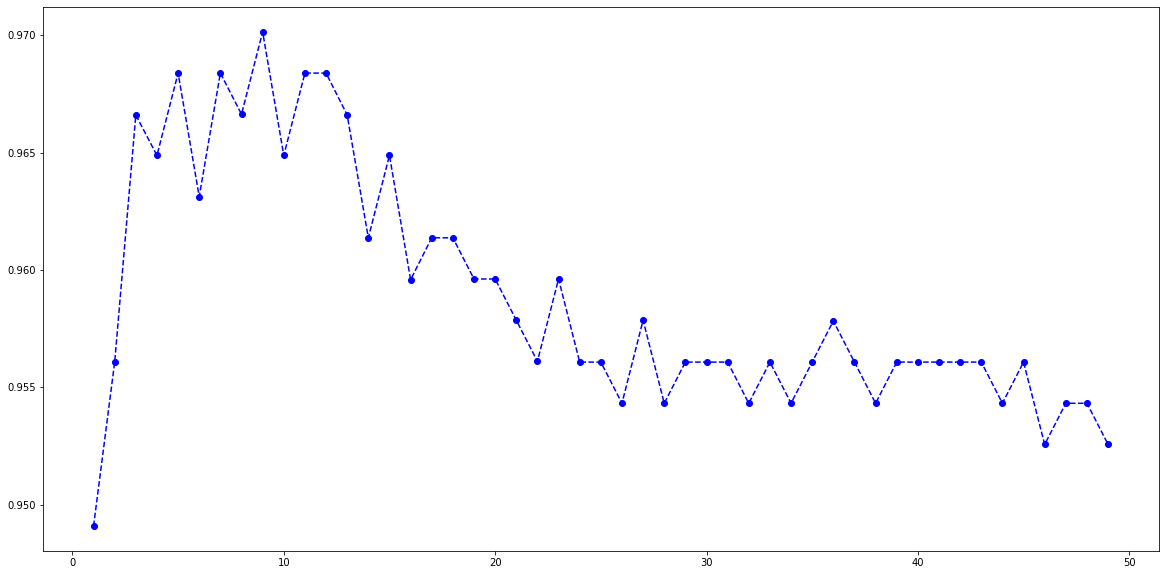

In [76]:
plt.figure(figsize=(20,10))
plt.plot(range(1,50), score_1, color= 'blue', linestyle = 'dashed', marker= 'o')

<IPython.core.display.Javascript object>

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

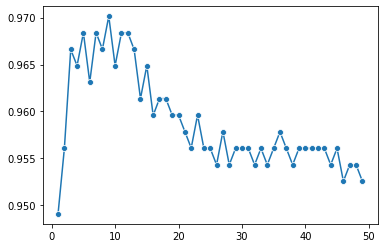

In [79]:
sns.lineplot(range(1,50), y = score_1, marker = 'o' )

#**Building our Model**

In [110]:
Model = KNeighborsClassifier(n_neighbors=9, weights='distance')

In [111]:
Model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [100]:
Y_pred = Model.predict(X_test)

In [88]:
Y_pred

array(['M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M',
       'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B',
       'B', 'M'], dtype=object)

In [112]:
Model.score(X_test, Y_test)*100

97.6608187134503

#**Checking the Confusion Matrix for the Model**

In [113]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred, labels=['M','B'])


In [114]:
cm_df = pd.DataFrame(cm, index = [i for i in ['M','B']], columns = [i for i in ['Predict M', 'Predict B']])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

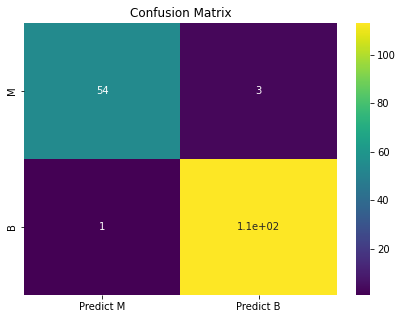

In [115]:
plt.figure(figsize=(7,5))
sns.heatmap(cm_df, annot=True, cmap = 'viridis')
plt.title('Confusion Matrix')
plt.show()

We have successfully built a model with 97.66% accuracy. A good one.